# Synthesizing the chronology of late Mesoproterozoic Laurentia tectonics

## Import scientific Python packages

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
import matplotlib.patches as patches
import matplotlib.ticker as tck
import matplotlib
import seaborn as sns
%config InlineBackend.figure_format='retina'

## Import compiled data

In [2]:
dates = pd.read_csv('../data/Mesoproterozoic_Laurentia_dates.csv')
dates.columns

Index(['Sample_No', 'Age', 'Error_Plus', 'Error_Minus', 'Age_Method',
       'Age_Interpretation', 'Age_Note', 'Age_Material', 'Age_Technique',
       'Age_Qualifier', 'Geological_Province', 'Province', 'Latitude',
       'Longitude', 'Location', 'Geological_Info', 'Rock_Type',
       'Rock_Description', 'References', 'Compilation_Source', 'Unnamed: 20',
       'UTM_Zone', 'UTM_Easting', 'UTM_Northing', 'Comment', 'Tectonic_Unit'],
      dtype='object')

## Define legend symbology

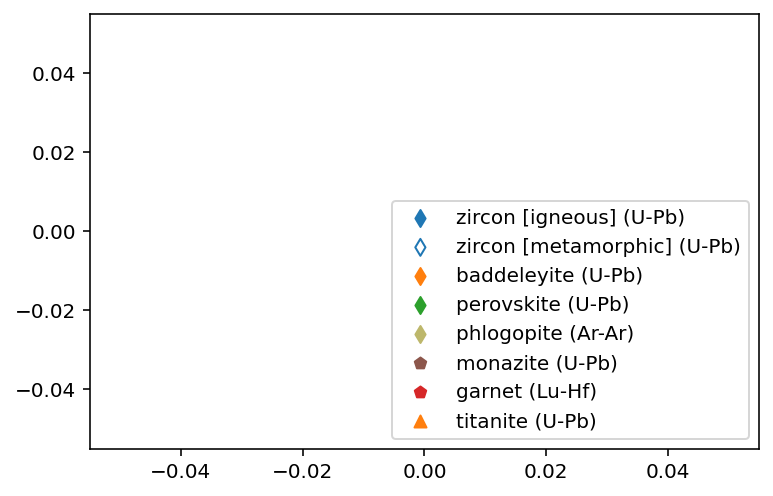

In [3]:
zircon_marker = plt.scatter([], [], c='C0', marker='d', label='zircon [igneous] (U-Pb)')
zircon_rim_marker = plt.scatter([], [], edgecolors='C0', color='none', marker='d', label='zircon [metamorphic] (U-Pb)')
bad_marker = plt.scatter([], [], c='C1', marker='d', label='baddeleyite (U-Pb)')
perov_marker = plt.scatter([], [], c='C2', marker='d', label='perovskite (U-Pb)')
phlog_marker = plt.scatter([], [], c='darkkhaki', marker='d', label='phlogopite (Ar-Ar)')
monazite_marker = plt.scatter([], [], marker='p',c='C5',label='monazite (U-Pb)')
garnet_marker = plt.scatter([], [], marker='p',color='C3',label='garnet (Lu-Hf)')
titanite_marker = plt.scatter([], [], marker='^',c='C1',label='titanite (U-Pb)')
plt.legend(handles=[zircon_marker,zircon_rim_marker,bad_marker,perov_marker,phlog_marker,monazite_marker,garnet_marker,titanite_marker],loc=4)
plt.show()

## Implement bootstrap method for duration estimates

In [4]:
def bootstrap_calc_plot(dates,bootstrap_n=10000,kde_bandwidth=0.8,plot=True):

    bootstrapped_mins = []
    bootstrapped_maxs = []

    for i in range(0,bootstrap_n):

        bootstrapped_dates = []

        resampled_data = dates.sample(n=len(dates),replace = True)
        resampled_data.reset_index(inplace=True)

        for n in resampled_data.index:
            bootstrapped_date = np.random.normal(resampled_data.Age[n], resampled_data.Error_Plus[n]/2, 1)
            bootstrapped_dates.append(bootstrapped_date[0])

        bootstrapped_mins.append(np.min(bootstrapped_dates)) 
        bootstrapped_maxs.append(np.max(bootstrapped_dates)) 
        if plot==True:
            if 1000-i > 0:
                sns.kdeplot(bootstrapped_dates,bw_adjust=kde_bandwidth,alpha=0.5,color='grey',shade=False,linewidth=0.1)
    
    if plot==True:
        sns.kdeplot(dates.Age,bw_adjust=kde_bandwidth,color='black')
            
    max_age = np.percentile(bootstrapped_maxs,5)
    min_age = np.percentile(bootstrapped_mins,95)
    
    return bootstrapped_maxs,bootstrapped_mins,max_age,min_age

def plot_bootstrap_hist(bootstrapped_maxs,bootstrapped_mins,max_age,min_age,age_range_max=1200,age_range_min=1100,ylim='hist_max'):
    hist_min = plt.hist(bootstrapped_mins,bins=np.arange(age_range_min,age_range_max,0.5),label='bootstrap min',color='#F8C471')
    hist_max = plt.hist(bootstrapped_maxs,bins=np.arange(age_range_min,age_range_max,0.5),label='bootstrap max',color='#48C9B0')
    rect = patches.Rectangle((min_age, 0), max_age-min_age, np.max(hist_max[0])*30, facecolor='lightgrey',zorder=-1,label=
                        'duration estimate')
    plt.gca().add_patch(rect)
    if ylim == 'hist_max':
        plt.ylim(0,np.max(hist_max[0])*1.1)
    if ylim == 'hist_min':
        plt.ylim(0,np.max(hist_min[0])*2)

In [5]:
bootstrap_number = 10000

## AMCG

In [6]:
AMCG_dates = dates[dates.Geological_Info == 'AMCG']
AMCG_dates = AMCG_dates[AMCG_dates.Age_Interpretation == 'Igneous']
AMCG_dates = AMCG_dates.sort_values('Age',ascending=False)
AMCG_dates.reset_index(inplace=True)

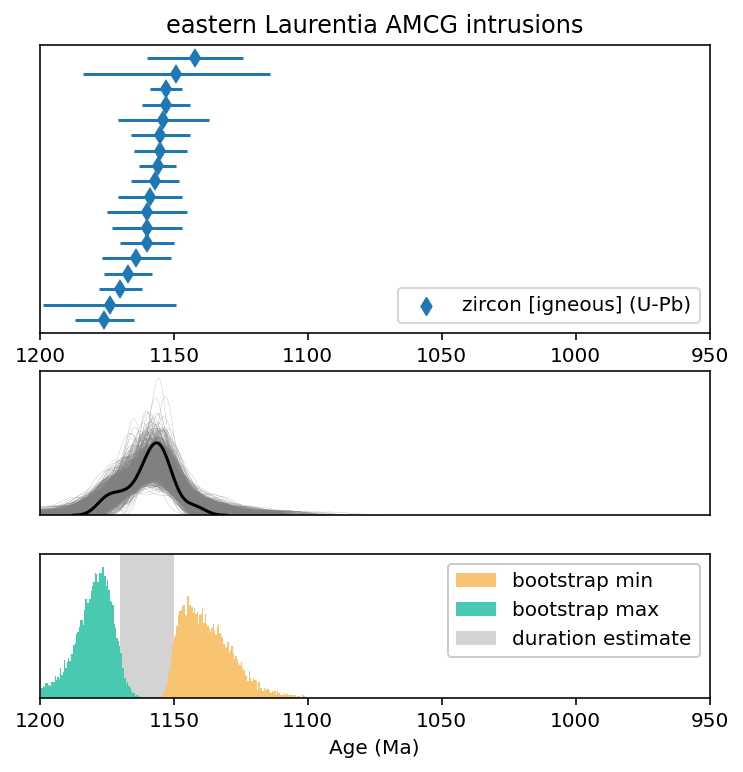

In [7]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('eastern Laurentia AMCG intrusions')

plt.errorbar(AMCG_dates.Age,
             AMCG_dates.index,
             xerr=AMCG_dates.Error_Plus,
             fmt='d',color='C0',label='zircon crystallization')

ax0.set_yticks([])

plt.legend(handles=[zircon_marker],loc=4)
plt.xlim(1200,950)

ax1 = fig.add_subplot(spec[1])

boot_maxs,boot_mins,AMCG_max,AMCG_min = bootstrap_calc_plot(AMCG_dates,bootstrap_n=bootstrap_number)
AMCG_max_median = np.median(boot_maxs)
AMCG_min_median = np.median(boot_mins)

plt.xlim(1200,950)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.set_xlabel('')

ax2 = fig.add_subplot(spec[2])
plot_bootstrap_hist(boot_maxs,boot_mins,AMCG_max,AMCG_min)

plt.legend(framealpha=1)
plt.xlim(1200,950)
ax2.set_yticks([])
plt.xlabel('Age (Ma)')

plt.savefig('geochron_AMCG.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [8]:
print(AMCG_max)
print(AMCG_min)
print('')
print(AMCG_max_median)
print(AMCG_min_median)

1170.0756394024538
1149.8869292534077

1179.2243132223937
1138.8992121169176


## Midcontinent crystallization dates (preceding Midcontinent Rift)

In [9]:
Abitibi_dates = dates[dates.Geological_Province == 'Midcontinent']
Abitibi_dates = Abitibi_dates.sort_values('Age',ascending=False)
Abitibi_dates.reset_index(inplace=True)

Abitibi_dates_b = Abitibi_dates[Abitibi_dates.Age_Material == 'Baddeleyite']
Abitibi_dates_perov = Abitibi_dates[Abitibi_dates.Age_Material == 'Perovskite']
Abitibi_dates_phlog = Abitibi_dates[Abitibi_dates.Age_Material == 'Phlogopite']

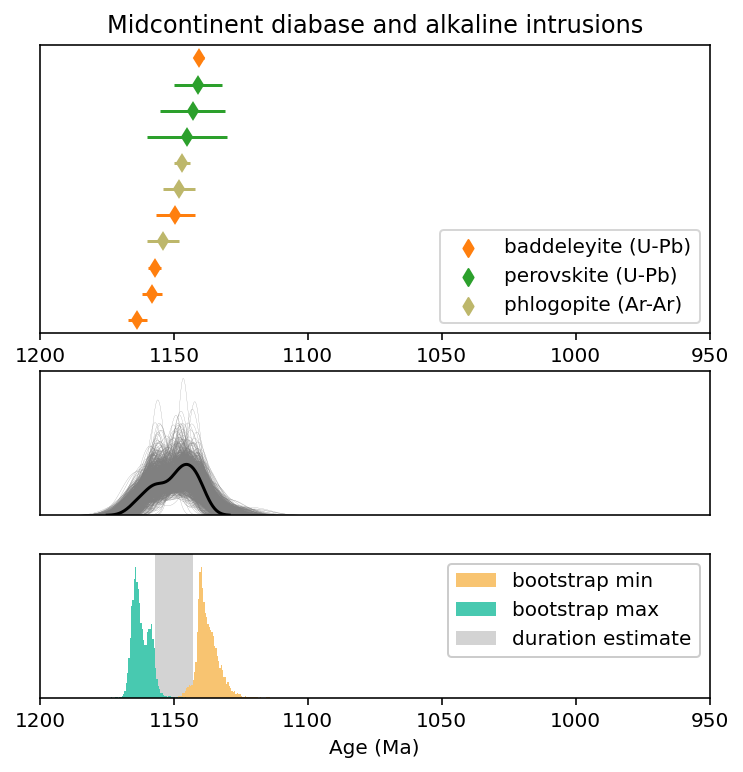

In [10]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Midcontinent diabase and alkaline intrusions')

plt.errorbar(Abitibi_dates_b.Age,
             Abitibi_dates_b.index,
             xerr=Abitibi_dates_b.Error_Plus,
             fmt='d',color='C1')

plt.errorbar(Abitibi_dates_perov.Age,
             Abitibi_dates_perov.index,
             xerr=Abitibi_dates_perov.Error_Plus,
             fmt='d',color='C2')

plt.errorbar(Abitibi_dates_phlog.Age,
             Abitibi_dates_phlog.index,
             xerr=Abitibi_dates_phlog.Error_Plus,
             fmt='d',color='darkkhaki')

plt.gca().set_yticks([])
#plt.gca().set_xticks([])
plt.legend(handles=[bad_marker,perov_marker,phlog_marker],loc=4)
plt.xlim(1200,950)

fig.add_subplot(spec[1])

boot_maxs,boot_mins,Abitibi_max,Abitibi_min = bootstrap_calc_plot(Abitibi_dates,bootstrap_n=bootstrap_number)
plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

ax2 = fig.add_subplot(spec[2])
plot_bootstrap_hist(boot_maxs,boot_mins,Abitibi_max,Abitibi_min)

plt.legend(framealpha=1)
plt.xlim(1200,950)
ax2.set_yticks([])
plt.xlabel('Age (Ma)')

plt.savefig('geochron_Abitibi_Alkaline.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

## Midcontinent Rift magmatic activity

In [11]:
MCR_dates = dates[dates.Geological_Province == 'Midcontinent Rift']
MCR_dates = MCR_dates.sort_values('Age',ascending=False)
MCR_dates.reset_index(inplace=True)

MCR_dates_b = MCR_dates[MCR_dates.Age_Material == 'Baddeleyite']
MCR_dates_z = MCR_dates[MCR_dates.Age_Material == 'Zircon']

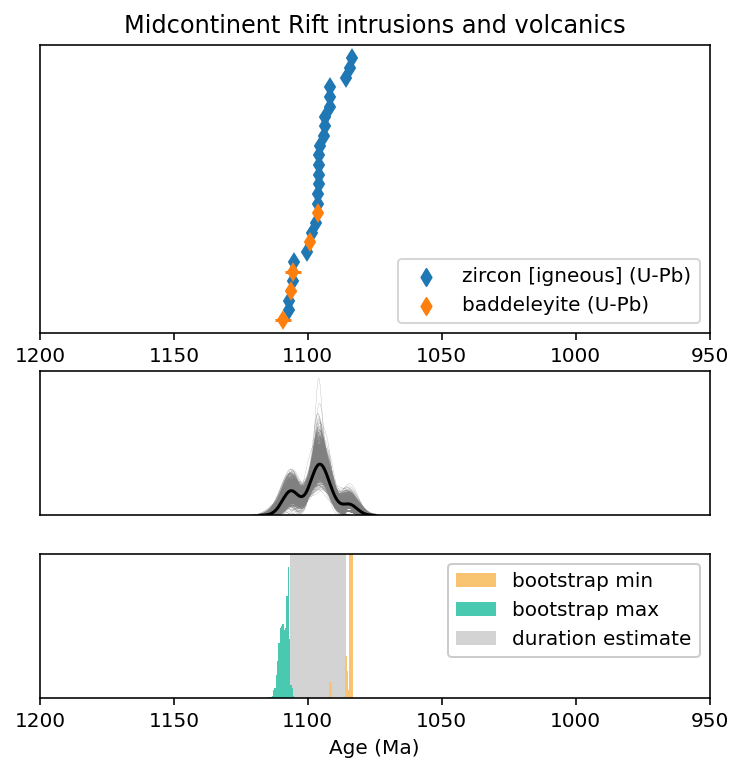

In [12]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Midcontinent Rift intrusions and volcanics')

plt.errorbar(MCR_dates_z.Age,
             MCR_dates_z.index,
             xerr=MCR_dates_z.Error_Plus,
             fmt='d',color='C0')

plt.errorbar(MCR_dates_b.Age,
             MCR_dates_b.index,
             xerr=MCR_dates_b.Error_Plus,
             fmt='d',color='C1')

plt.gca().set_yticks([])
#plt.gca().set_xticks([])
plt.legend(handles=[zircon_marker,bad_marker],loc=4)
plt.xlim(1200,950)

fig.add_subplot(spec[1])

boot_maxs,boot_mins,MCR_max,MCR_min = bootstrap_calc_plot(MCR_dates,bootstrap_n=bootstrap_number)
plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

ax2 = fig.add_subplot(spec[2])
plot_bootstrap_hist(boot_maxs,boot_mins,MCR_max,MCR_min,age_range_max=1150,age_range_min=1050)

plt.legend(framealpha=1)
plt.xlim(1200,950)
plt.gca().set_ylabel('')
ax2.set_yticks([])
plt.xlabel('Age (Ma)')

plt.savefig('geochron_MCR.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

## Joint Midcontinent Plot


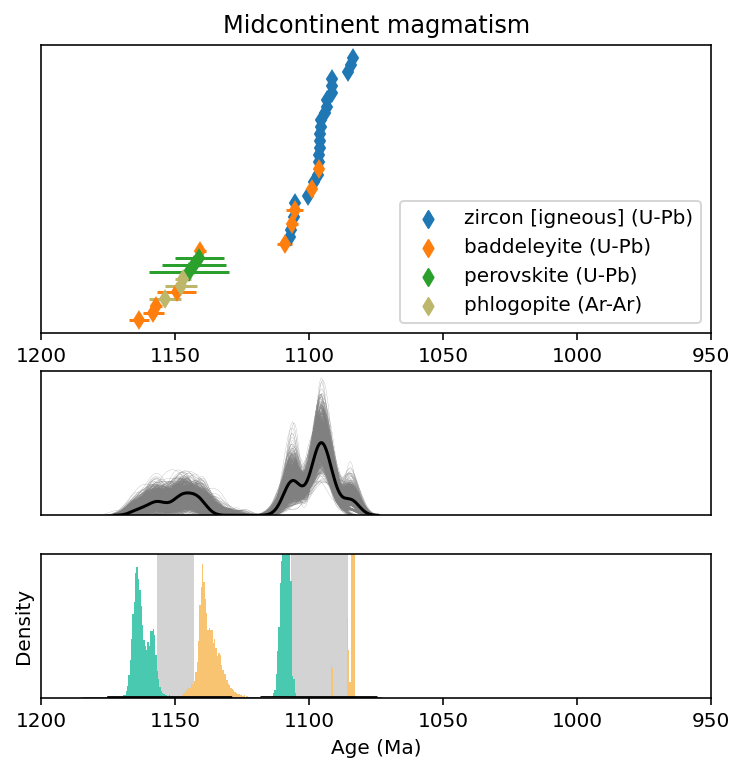

In [13]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Midcontinent magmatism')

plt.errorbar(Abitibi_dates_b.Age,
             Abitibi_dates_b.index,
             xerr=Abitibi_dates_b.Error_Plus,
             fmt='d',color='C1')

plt.errorbar(Abitibi_dates_perov.Age,
             Abitibi_dates_perov.index,
             xerr=Abitibi_dates_perov.Error_Plus,
             fmt='d',color='C2')

plt.errorbar(Abitibi_dates_phlog.Age,
             Abitibi_dates_phlog.index,
             xerr=Abitibi_dates_phlog.Error_Plus,
             fmt='d',color='darkkhaki')

plt.errorbar(MCR_dates_z.Age,
             MCR_dates_z.index+len(Abitibi_dates),
             xerr=MCR_dates_z.Error_Plus,
             fmt='d',color='C0')

plt.errorbar(MCR_dates_b.Age,
             MCR_dates_b.index+len(Abitibi_dates),
             xerr=MCR_dates_b.Error_Plus,
             fmt='d',color='C1')

plt.gca().set_yticks([])
#plt.gca().set_xticks([])
plt.legend(handles=[zircon_marker,bad_marker,perov_marker,phlog_marker],loc=4)
plt.xlim(1200,950)

fig.add_subplot(spec[1])

boot_maxs,boot_mins,Midcontinent_max,Midcontinent_max = bootstrap_calc_plot(pd.concat([Abitibi_dates,MCR_dates]),
                                                                            kde_bandwidth=0.25,bootstrap_n=bootstrap_number)
plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

ax2 = fig.add_subplot(spec[2])

boot_maxs,boot_mins,MCR_max,MCR_min = bootstrap_calc_plot(MCR_dates,bootstrap_n=bootstrap_number)
plot_bootstrap_hist(boot_maxs,boot_mins,MCR_max,MCR_min,age_range_max=1150,age_range_min=1050)

MCR_max_median = np.median(boot_maxs)
MCR_min_median = np.median(boot_mins)

boot_maxs,boot_mins,Abitibi_max,Abitibi_min = bootstrap_calc_plot(Abitibi_dates,bootstrap_n=bootstrap_number)
plot_bootstrap_hist(boot_maxs,boot_mins,Abitibi_max,Abitibi_min)

Abitibi_max_median = np.median(boot_maxs)
Abitibi_min_median = np.median(boot_mins)

plt.xlim(1200,950)
ax2.set_yticks([])
plt.xlabel('Age (Ma)')

plt.savefig('geochron_Midcontinent.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [14]:
print(Abitibi_max)
print(Abitibi_min)
print('')
print(Abitibi_max_median)
print(Abitibi_min_median)
print('')
print(MCR_max)
print(MCR_min)
print('')
print(MCR_max_median)
print(MCR_min_median)

1156.922130088968
1143.0157229657748

1162.9627194555187
1138.2330680201437

1106.7517169805592
1085.6632457058015

1108.6375096887077
1083.5736061378718


## Blue Ridge metamorphism dates

Metamorphic dates from the Blue Ridge are compiled using the same headers as the GSC Knowledgebase

In [15]:
Blue_Ridge_dates = dates[(dates.Geological_Province == 'Blue Ridge') & (dates.Age_Material != 'Titanite')]
Blue_Ridge_dates = Blue_Ridge_dates.sort_values('Age',ascending=False)
Blue_Ridge_dates.reset_index(inplace=True)
Blue_Ridge_dates.tail(1)

,index,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,...,Rock_Type,Rock_Description,References,Compilation_Source,Unnamed: 20,UTM_Zone,UTM_Easting,UTM_Northing,Comment,Tectonic_Unit
47,682,MR-11-193,984.0,17.0,NaN,NaN,Metamorphic,76 weighted mean,Zircon,SHRIMP,...,NaN,Ylbg lineated biotite meta-granite,NaN,compiled by NSH,Tollo2017a,NaN,NaN,NaN,NaN,NaN


In [16]:
Blue_Ridge_dates_Shaw = Blue_Ridge_dates[Blue_Ridge_dates.Age>1120]
Blue_Ridge_dates_Gren = Blue_Ridge_dates[Blue_Ridge_dates.Age<1120]

In [17]:
Blue_Ridge_dates_z = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'Zircon']
#Blue_Ridge_dates_t = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'Titanite']
Blue_Ridge_dates_g = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'Garnet']
Blue_Ridge_dates_m = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'Monazite']

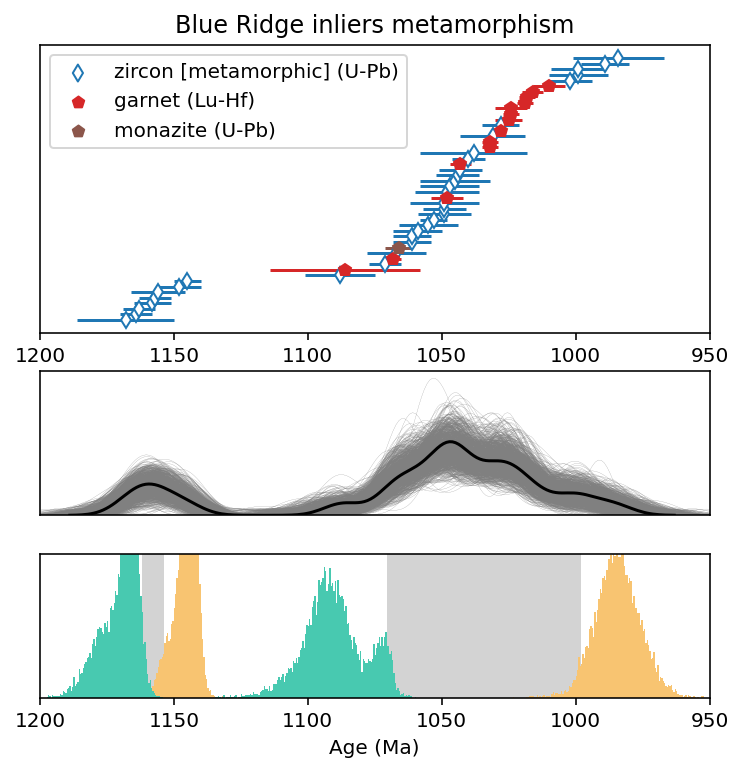

In [18]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])


ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Blue Ridge inliers metamorphism')

plt.errorbar(Blue_Ridge_dates_z.Age,
             Blue_Ridge_dates_z.index,
             xerr=Blue_Ridge_dates_z.Error_Plus,
             fmt='d',color='C0',mfc='white',label='zircon rims')

# plt.errorbar(Blue_Ridge_dates_t.Age,
#              Blue_Ridge_dates_t.index,
#              xerr=Blue_Ridge_dates_t.Error_Plus,
#              fmt='^',color='C1',label='titanite')

plt.errorbar(Blue_Ridge_dates_g.Age,
             Blue_Ridge_dates_g.index,
             xerr=Blue_Ridge_dates_g.Error_Plus,
             fmt='p',color='C3',label='garnet (Lu-Hf)')

plt.errorbar(Blue_Ridge_dates_m.Age,
             Blue_Ridge_dates_m.index,
             xerr=Blue_Ridge_dates_m.Error_Plus,
             fmt='p',color='C5',label='monazite')

plt.xlim(1200,950)
plt.gca().set_yticks([])
plt.legend(handles=[zircon_rim_marker,garnet_marker,monazite_marker],loc=2)

fig.add_subplot(spec[1])
boot_maxs,boot_mins,Blue_Ridge_max,Blue_Ridge_min = bootstrap_calc_plot(Blue_Ridge_dates,bootstrap_n=bootstrap_number,kde_bandwidth=0.3)

plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

fig.add_subplot(spec[2])
boot_maxs,boot_mins,Blue_Ridge_Shaw_max,Blue_Ridge_Shaw_min = bootstrap_calc_plot(Blue_Ridge_dates_Shaw,bootstrap_n=bootstrap_number,
                                                                                  kde_bandwidth=0.8,plot=False)
plot_bootstrap_hist(boot_maxs,boot_mins,Blue_Ridge_Shaw_max,Blue_Ridge_Shaw_min,age_range_max=1200,age_range_min=950)

Blue_Ridge_Shaw_max_median = np.median(boot_maxs)
Blue_Ridge_Shaw_min_median = np.median(boot_mins)

boot_maxs,boot_mins,Blue_Ridge_Gren_max,Blue_Ridge_Gren_min = bootstrap_calc_plot(Blue_Ridge_dates_Gren,bootstrap_n=bootstrap_number,
                                                                                  kde_bandwidth=0.8,plot=False)
plot_bootstrap_hist(boot_maxs,boot_mins,Blue_Ridge_Gren_max,Blue_Ridge_Gren_min,age_range_max=1200,age_range_min=950)

Blue_Ridge_Gren_max_median = np.median(boot_maxs)
Blue_Ridge_Gren_min_median = np.median(boot_mins)

#plt.legend(framealpha=1,bbox_to_anchor=(1.4,1))
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.xlim(1200,950)
plt.xlabel('Age (Ma)')

plt.savefig('geochron_Blue_Ridge.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [19]:
print(Blue_Ridge_Shaw_max)
print(Blue_Ridge_Shaw_min)
print('')
print(Blue_Ridge_Shaw_max_median)
print(Blue_Ridge_Shaw_min_median)
print('')
print(Blue_Ridge_Gren_max)
print(Blue_Ridge_Gren_min)
print('')
print(Blue_Ridge_Gren_max_median)
print(Blue_Ridge_Gren_min_median)

1161.8339947687562
1153.507462061663

1168.0097272784365
1144.7012327165587

1070.2536572238712
997.8959365610851

1090.8285443122463
984.4541137848257


## Grenville metamorphism

In [20]:
Grenville_Province_dates = dates[dates.Geological_Province == 'Grenville Province']
Grenville_Province_dates = Grenville_Province_dates.sort_values('Age',ascending=False)
Grenville_Province_dates = Grenville_Province_dates[Grenville_Province_dates['Age'] < 1250]
Grenville_Province_dates = Grenville_Province_dates[Grenville_Province_dates['Error_Plus'] < 40]
Grenville_Province_dates = Grenville_Province_dates[Grenville_Province_dates['Error_Plus'] != 0]
Grenville_Province_dates = Grenville_Province_dates[Grenville_Province_dates['Age_Qualifier'] != 'Unverified']

In [21]:
Adirondack_dates_meta = dates[(dates.Geological_Province == 'Adirondacks') & (dates.Age_Interpretation == 'Metamorphic')]
Adirondack_dates_meta

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,...,Rock_Type,Rock_Description,References,Compilation_Source,Unnamed: 20,UTM_Zone,UTM_Easting,UTM_Northing,Comment,Tectonic_Unit
792,AM87-10,1049.0,4.0,NaN,U/Pb,Metamorphic,76 weighted mean,Zircon,SHRIMP,NaN,...,Plutonic,Minerva charnockite,NaN,compiled by NSH,Hamilton2004a,NaN,NaN,NaN,NaN,NaN
794,AM86-8,1031.0,30.0,NaN,U/Pb,Metamorphic,76 weighted mean,Zircon,SHRIMP,NaN,...,Plutonic,Snowy Mountain mangerite,NaN,compiled by NSH,Hamilton2004a,NaN,NaN,NaN,NaN,NaN
796,AM87-9,1041.0,6.0,NaN,U/Pb,Metamorphic,76 weighted mean,Zircon,SHRIMP,NaN,...,Plutonic,Gore Mountain charnockite,NaN,compiled by NSH,Hamilton2004a,NaN,NaN,NaN,NaN,NaN
798,AM87-8,1048.0,10.0,NaN,U/Pb,Metamorphic,76 weighted mean,Zircon,SHRIMP,NaN,...,Plutonic,Oregon Dome ferrodiorite interpretted to be co...,NaN,compiled by NSH,Hamilton2004a,NaN,NaN,NaN,NaN,NaN
814,cm,1042.0,4.0,NaN,U/Pb,Metamorphic,76 weighted mean,Zircon,SHRIMP,NaN,...,Metamorphic,diopside-bearing quartzite with metamorphic zi...,NaN,compiled by NSH,Chiarenzelli2011b,NaN,NaN,NaN,NaN,NaN
815,cm,1073.0,15.0,NaN,U/Pb,Metamorphic,76 weighted mean,Zircon,SHRIMP,NaN,...,Metamorphic,diopside-bearing quartzite with metamorphic zi...,NaN,compiled by NSH,Chiarenzelli2011b,NaN,NaN,NaN,NaN,NaN
816,16TG-154,1167.0,9.4,NaN,U/Pb,Metamorphic,NaN,Monazite,Microprobe,NaN,...,Metamorphic,NaN,NaN,compiled by NSH,Williams2019a,NaN,NaN,NaN,NaN,NaN
817,16TG-154,1163.0,6.0,NaN,U/Pb,Metamorphic,NaN,Monazite,Microprobe,NaN,...,Metamorphic,NaN,NaN,compiled by NSH,Williams2019a,NaN,NaN,NaN,NaN,NaN
818,16TG-154,1159.0,13.0,NaN,U/Pb,Metamorphic,NaN,Monazite,Microprobe,NaN,...,Metamorphic,NaN,NaN,compiled by NSH,Williams2019a,NaN,NaN,NaN,NaN,NaN


In [22]:
Grenville_dates_t = Grenville_Province_dates[(Grenville_Province_dates.Age_Material == 'titanite')|(Grenville_Province_dates.Age_Material == 'Titanite')]

Grenville_dates_m = Grenville_Province_dates[(Grenville_Province_dates.Age_Material == 'Monazite')]
Grenville_dates_z = Grenville_Province_dates[(Grenville_Province_dates.Age_Material == 'Zircon')
                                             &(Grenville_Province_dates.Age_Technique != 'TIMS')]

Grenville_dates_m_z = pd.concat([Grenville_dates_m,Grenville_dates_z,Adirondack_dates_meta])
Grenville_dates_m_z = Grenville_dates_m_z.sort_values('Age',ascending=False)
Grenville_dates_m_z.reset_index(inplace=True)
Grenville_dates_m =  Grenville_dates_m_z[(Grenville_dates_m_z.Age_Material == 'Monazite')]
Grenville_dates_z =  Grenville_dates_m_z[(Grenville_dates_m_z.Age_Material == 'Zircon')]

In [23]:
Grenville_dates_m_z_Gren = Grenville_dates_m_z[Grenville_dates_m_z.Age < 1100 ]
Grenville_dates_m_z_Shaw = Grenville_dates_m_z[Grenville_dates_m_z.Age > 1140]

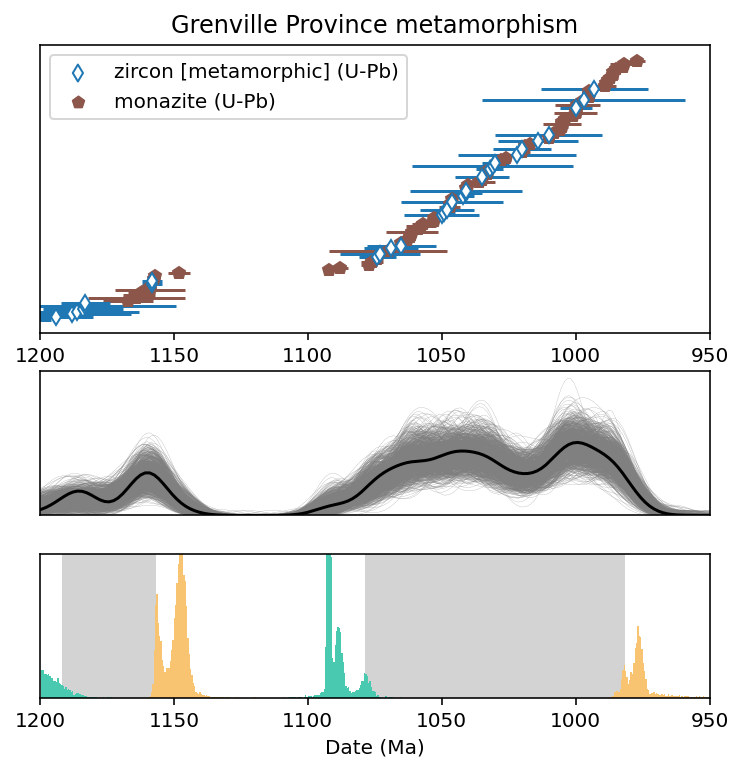

In [24]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Grenville Province metamorphism')

# plt.errorbar(Grenville_dates_t.Age,
#              Grenville_dates_t.index,
#              xerr=Grenville_dates_t.Error_Plus,
#              fmt='^',color='C1',label='titanite')

plt.errorbar(Grenville_dates_m.Age,
             Grenville_dates_m.index,
             xerr=Grenville_dates_m.Error_Plus,
             fmt='p',color='C5',label='monazite')

plt.errorbar(Grenville_dates_z.Age,
             Grenville_dates_z.index,
             xerr=Grenville_dates_z.Error_Plus,
             fmt='d',color='C0',mfc='white',label='zircon rims')


plt.xlim(1200,950)
plt.gca().set_yticks([])

plt.legend(handles=[zircon_rim_marker,monazite_marker],loc=2)

fig.add_subplot(spec[1])

boot_maxs,boot_mins,Grenville_max,Grenville_min = bootstrap_calc_plot(Grenville_dates_m_z,bootstrap_n=bootstrap_number,kde_bandwidth=0.25)


plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

fig.add_subplot(spec[2])
boot_maxs,boot_mins,Grenville_Shaw_max,Grenville_Shaw_min = bootstrap_calc_plot(Grenville_dates_m_z_Shaw,
                                                                                bootstrap_n=bootstrap_number,kde_bandwidth=0.8,plot=False)
Grenville_Shaw_max_median = np.median(boot_maxs)
Grenville_Shaw_min_median = np.median(boot_mins)
plot_bootstrap_hist(boot_maxs,boot_mins,Grenville_Shaw_max,Grenville_Shaw_min,age_range_max=1200,age_range_min=950)

boot_maxs,boot_mins,Grenville_Gren_max,Grenville_Gren_min = bootstrap_calc_plot(Grenville_dates_m_z_Gren,
                                                                                bootstrap_n=bootstrap_number,kde_bandwidth=0.8,plot=False)
Grenville_Gren_max_median = np.median(boot_maxs)
Grenville_Gren_min_median = np.median(boot_mins)
plot_bootstrap_hist(boot_maxs,boot_mins,Grenville_Gren_max,Grenville_Gren_min,age_range_max=1200,age_range_min=950,ylim='hist_min')

plt.xlim(1200,950)
plt.xlabel('Date (Ma)')
plt.gca().set_yticks([])
plt.gca().set_ylabel('')

plt.savefig('geochron_Grenville.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [25]:
print(Grenville_Shaw_max)
print(Grenville_Shaw_min)
print('')
print(Grenville_Shaw_max_median)
print(Grenville_Shaw_min_median)
print('')
print(Grenville_Gren_max)
print(Grenville_Gren_min)
print('')
print(Grenville_Gren_max_median)
print(Grenville_Gren_min_median)

1191.8765745384987
1156.7378440487814

1210.1868950522978
1148.3766476149408

1078.4455540589008
981.553705524734

1091.7929080926306
916.5094093471517


In [26]:
import matplotlib.image as mpimg

geochron_Grenville_img = mpimg.imread('geochron_Grenville.png')
geochron_Blue_Ridge_img = mpimg.imread('geochron_Blue_Ridge.png')
geochron_AMCG_img = mpimg.imread('geochron_AMCG.png')
geochron_Abitibi_img = mpimg.imread('geochron_Abitibi_Alkaline.png')
geochron_MCR_img = mpimg.imread('geochron_MCR.png')
geochron_Midcontinent_img = mpimg.imread('geochron_Midcontinent.png')

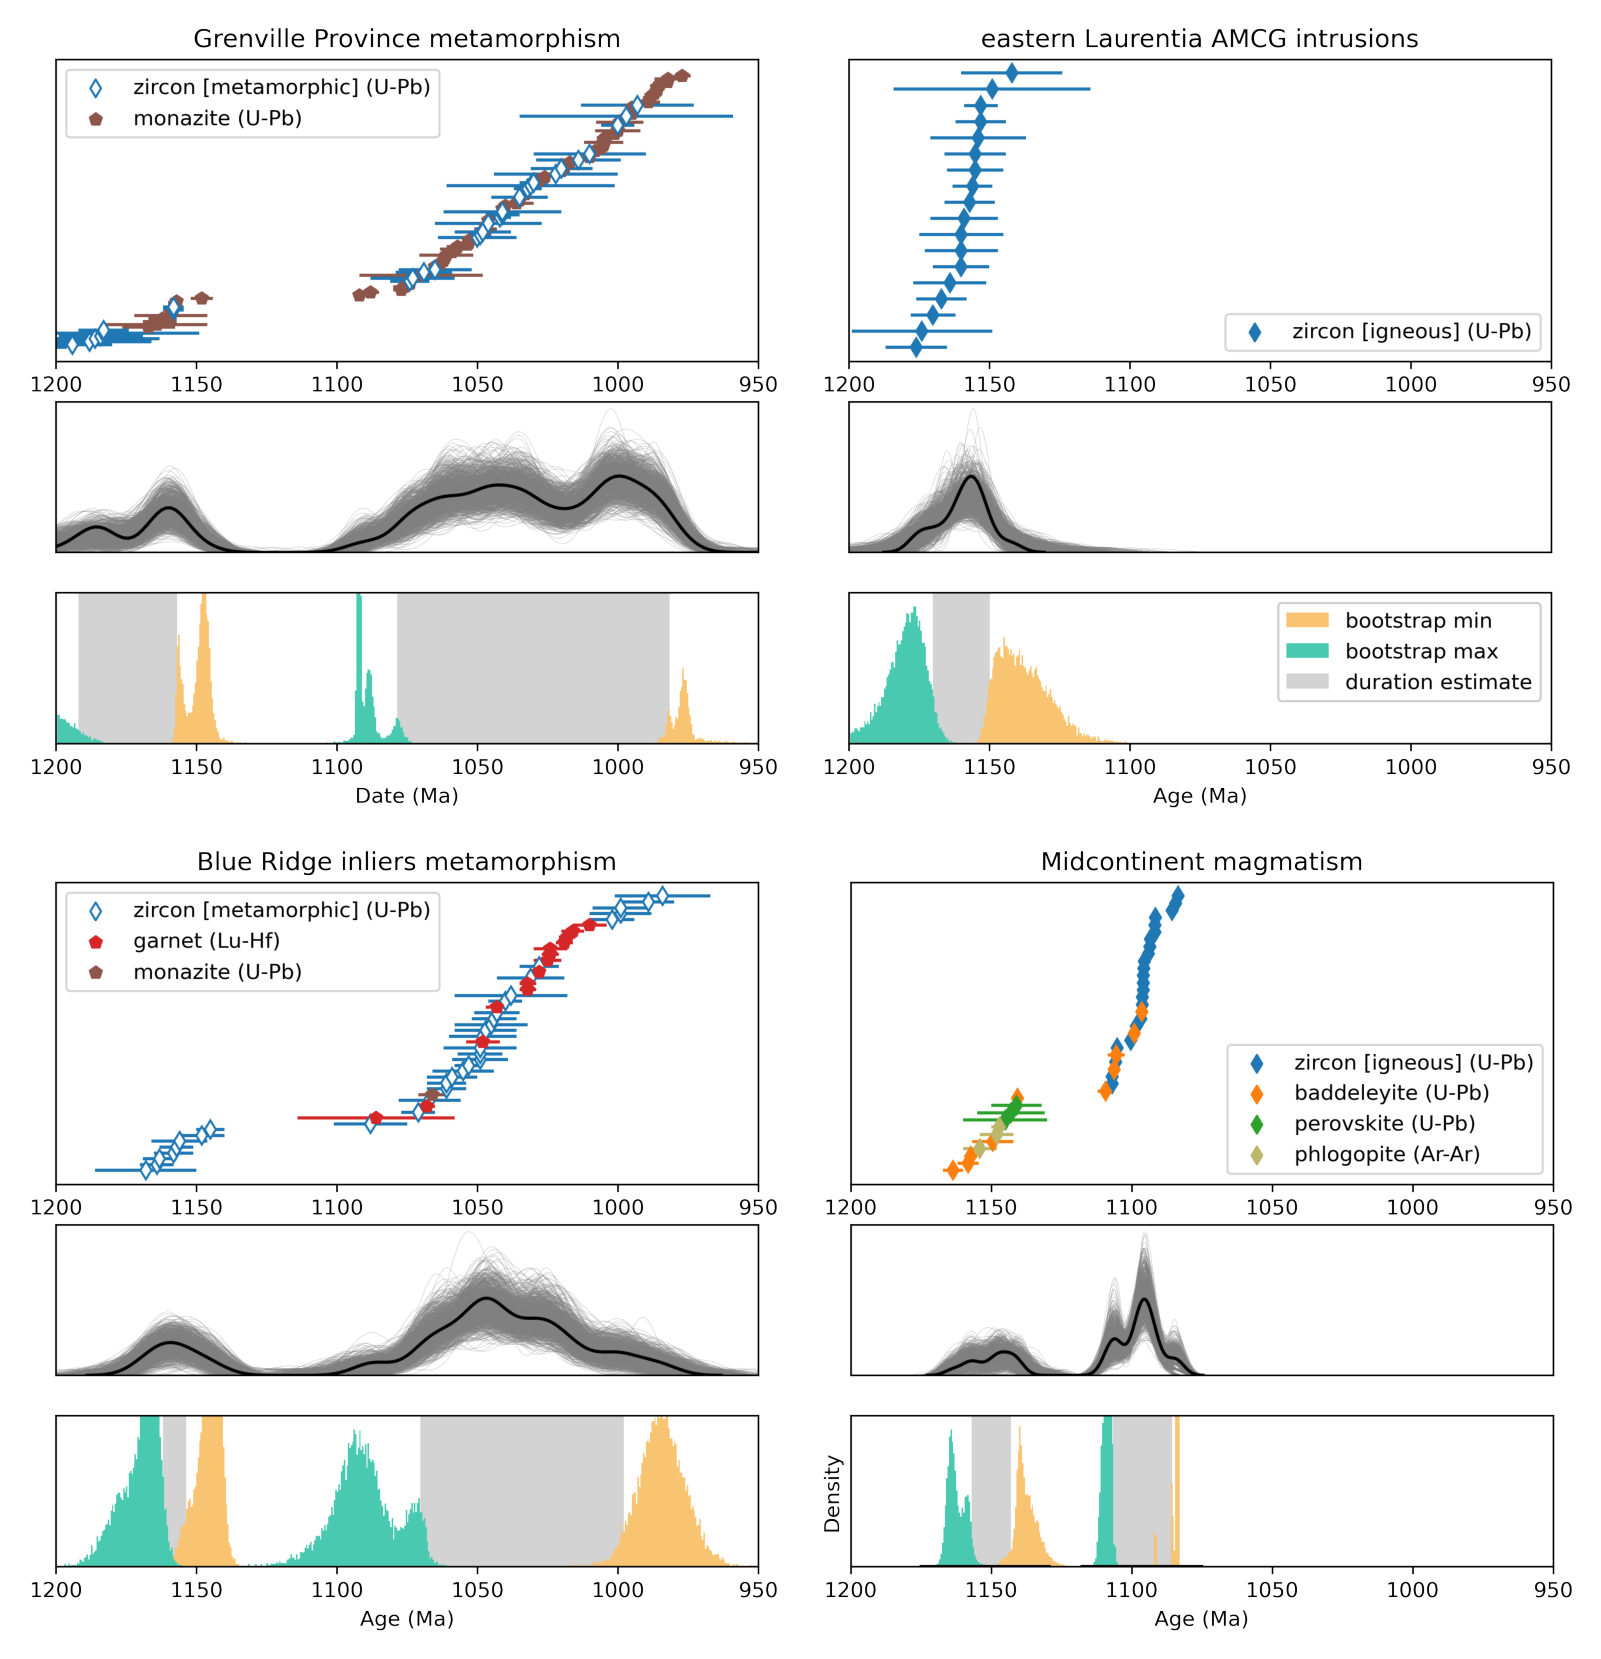

In [27]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(15., 15.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [geochron_Grenville_img,
                         geochron_AMCG_img,
                         geochron_Blue_Ridge_img,
                         geochron_Midcontinent_img]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axis("off")


plt.subplots_adjust(wspace=-5, hspace=-5)

plt.savefig('geochron_figure.png',dpi=300)
plt.show()

## Summary timelines

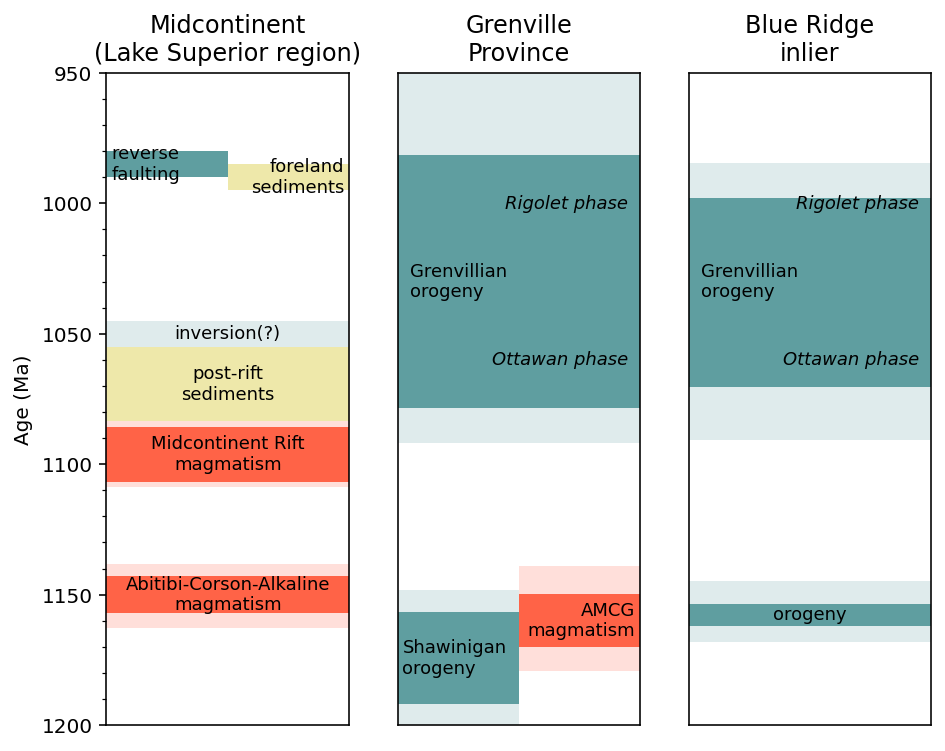

In [36]:
fig = plt.figure(figsize=(10,6))
spec = gridspec.GridSpec(ncols=4, nrows=1,
                         width_ratios=[1, 1, 1, 1])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Midcontinent\n(Lake Superior region)')

Abitibi_median_rect = matplotlib.patches.Rectangle((-1, Abitibi_max_median),2, Abitibi_min_median-Abitibi_max_median, facecolor='tomato',edgecolor='none', alpha=0.2)
ax0.add_patch(Abitibi_median_rect)
Abitibi_rect = matplotlib.patches.Rectangle((-1, Abitibi_max),2, Abitibi_min-Abitibi_max, facecolor='tomato',edgecolor='none',)
ax0.add_patch(Abitibi_rect)
plt.text(0.5,(Abitibi_max+Abitibi_min)/2,'Abitibi-Corson-Alkaline\nmagmatism',horizontalalignment='center',verticalalignment='center',fontsize=9)

MCR_median_rect = matplotlib.patches.Rectangle((-1, MCR_max_median),2, MCR_min_median-MCR_max_median, facecolor='tomato', edgecolor='none', alpha=0.2)
ax0.add_patch(MCR_median_rect)
MCR_rect = matplotlib.patches.Rectangle((-1, MCR_max),2, MCR_min-MCR_max, facecolor='tomato', edgecolor='none')
ax0.add_patch(MCR_rect)
plt.text(0.5,(MCR_max+MCR_min)/2,'Midcontinent Rift\nmagmatism',horizontalalignment='center',verticalalignment='center',fontsize=9)

Oronto_rect = matplotlib.patches.Rectangle((0, 1055),1, MCR_min_median-1055, facecolor='palegoldenrod', edgecolor='none')
ax0.add_patch(Oronto_rect)
plt.text(0.5,(MCR_min_median+1055)/2,'post-rift\nsediments',horizontalalignment='center',verticalalignment='center',fontsize=9)

Montreal_River_rect = matplotlib.patches.Rectangle((0, 1045),1, 10,facecolor='cadetblue',edgecolor='none', alpha=0.2)
ax0.add_patch(Montreal_River_rect)
plt.text(0.5,(1045+1055)/2,'inversion(?)',horizontalalignment='center',verticalalignment='center',fontsize=9)

Kewee_Fault_rect = matplotlib.patches.Rectangle((0, 980),0.5, 10, facecolor='cadetblue',edgecolor='none',)
ax0.add_patch(Kewee_Fault_rect)
plt.text(0.02,985,'reverse\nfaulting',horizontalalignment='left',verticalalignment='center',fontsize=9)

Jacobsville_rect = matplotlib.patches.Rectangle((0.5, 985),0.5, 10, facecolor='palegoldenrod',edgecolor='none',)
ax0.add_patch(Jacobsville_rect)
plt.text(0.98,990,'foreland\nsediments',horizontalalignment='right',verticalalignment='center',fontsize=9)

plt.ylim(1200,950)
plt.gca().set_xticks([])
plt.gca().yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.ylabel('Age (Ma)')

ax1 = fig.add_subplot(spec[1])
ax1.title.set_text('Grenville\nProvince')

ACMG_median_rect = matplotlib.patches.Rectangle((0.5, AMCG_max_median),2, AMCG_min_median-AMCG_max_median, facecolor='tomato',edgecolor='none', alpha=0.2)
ax1.add_patch(ACMG_median_rect)
ACMG_rect = matplotlib.patches.Rectangle((0.5, AMCG_max),2, AMCG_min-AMCG_max, facecolor='tomato',edgecolor='none')
ax1.add_patch(ACMG_rect)
plt.text(0.98,(AMCG_max+AMCG_min)/2,'AMCG\nmagmatism',horizontalalignment='right',verticalalignment='center',fontsize=9)

Grenville_Shaw_median_rect = matplotlib.patches.Rectangle((0, Grenville_Shaw_max_median),0.5, Grenville_Shaw_min_median-Grenville_Shaw_max_median, facecolor='cadetblue',edgecolor='none', alpha=0.2)
ax1.add_patch(Grenville_Shaw_median_rect)
Grenville_Shaw_rect = matplotlib.patches.Rectangle((0, Grenville_Shaw_max),0.5, Grenville_Shaw_min-Grenville_Shaw_max, facecolor='cadetblue',edgecolor='none')
ax1.add_patch(Grenville_Shaw_rect)
plt.text(0.02,(Grenville_Shaw_max+Grenville_Shaw_min)/2,'Shawinigan\norogeny',horizontalalignment='left',verticalalignment='center',fontsize=9)

Grenville_Grenville_median_rect = matplotlib.patches.Rectangle((-1, Grenville_Gren_max_median),2, Grenville_Gren_min_median-Grenville_Gren_max_median, facecolor='cadetblue',edgecolor='none', alpha=0.2)
ax1.add_patch(Grenville_Grenville_median_rect)
Grenville_Grenville_rect = matplotlib.patches.Rectangle((-1, Grenville_Gren_max),2, Grenville_Gren_min-Grenville_Gren_max, facecolor='cadetblue',edgecolor='none')
ax1.add_patch(Grenville_Grenville_rect)
plt.text(0.05,(Grenville_Gren_max+Grenville_Gren_min)/2,'Grenvillian\norogeny',horizontalalignment='left',verticalalignment='center',fontsize=9)
plt.text(0.95,1060,'Ottawan phase',horizontalalignment='right',verticalalignment='center',style='italic',fontsize=9)
plt.text(0.95,1000,'Rigolet phase',horizontalalignment='right',verticalalignment='center',style='italic',fontsize=9)

plt.ylim(1200,950)
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xticks([])

ax2 = fig.add_subplot(spec[2])
ax2.title.set_text('Blue Ridge\ninlier')

Blue_Ridge_Shaw_median_rect = matplotlib.patches.Rectangle((-1, Blue_Ridge_Shaw_max_median),2, Blue_Ridge_Shaw_min_median-Blue_Ridge_Shaw_max_median,
                                                           facecolor='cadetblue',edgecolor='none', alpha=0.2)
ax2.add_patch(Blue_Ridge_Shaw_median_rect)

Blue_Ridge_Shaw_rect = matplotlib.patches.Rectangle((-1, Blue_Ridge_Shaw_max),2, Blue_Ridge_Shaw_min-Blue_Ridge_Shaw_max,facecolor='cadetblue',edgecolor='none')
ax2.add_patch(Blue_Ridge_Shaw_rect)
plt.text(0.5,(Blue_Ridge_Shaw_max+Blue_Ridge_Shaw_min)/2,'orogeny',horizontalalignment='center',verticalalignment='center',fontsize=9)



Blue_Ridge_Grenville_median_rect = matplotlib.patches.Rectangle((-1, Blue_Ridge_Gren_max_median),2, Blue_Ridge_Gren_min_median-Blue_Ridge_Gren_max_median,
                                                                facecolor='cadetblue',edgecolor='none', alpha=0.2)
ax2.add_patch(Blue_Ridge_Grenville_median_rect)

Blue_Ridge_Grenville_rect = matplotlib.patches.Rectangle((-1, Blue_Ridge_Gren_max),2, Blue_Ridge_Gren_min-Blue_Ridge_Gren_max, facecolor='cadetblue',edgecolor='none')
ax2.add_patch(Blue_Ridge_Grenville_rect)

plt.text(0.05,(Grenville_Gren_max+Grenville_Gren_min)/2,'Grenvillian\norogeny',horizontalalignment='left',verticalalignment='center',fontsize=9)
plt.text(0.95,1060,'Ottawan phase',horizontalalignment='right',verticalalignment='center',style='italic',fontsize=9)
plt.text(0.95,1000,'Rigolet phase',horizontalalignment='right',verticalalignment='center',style='italic',fontsize=9)

plt.ylim(1200,950)
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xticks([])

# ax3 = fig.add_subplot(spec[3])
# ax3.title.set_text('Texas')

# Blue_Ridge_Shaw_median_rect = matplotlib.patches.Rectangle((-1, Blue_Ridge_Shaw_max_median),2, Blue_Ridge_Shaw_min_median-Blue_Ridge_Shaw_max_median, color='cadetblue', alpha=0.2)
# ax3.add_patch(Blue_Ridge_Shaw_median_rect)

# plt.ylim(1200,950)
# plt.gca().set_yticks([])
# plt.gca().set_ylabel('')
# plt.gca().set_xticks([])


plt.savefig('timeline_figure.pdf')
plt.show()

## Import the Canadian Geochronology Knowledgebase

The CGKB compilation represents publicly available geochronological information for  Canada. The data is compiled from federal, provincial and territorial government publications and reports, university theses, books and journal articles.

https://www.nrcan.gc.ca/maps-tools-publications/tools/geodetic-reference-systems/canadian-geochronology-knowledgebase/18211

In [30]:
GSC_data = pd.read_csv('../data/GSC_compilation/Geochron_en.txt',sep='\t')
GSC_data.head(1)

,Age_No,Lab_No,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,...,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References,LastUpdated
0,16505,2808,Missi 5,1881.0,8.0,8.0,Pb-evap,Detrital,"Fraction 3, age is 207Pb/206Pb age. U-not meas...",Zircon,...,Churchill/Trans-Hudson Orogen,MB,54.76676,-101.83372,"Flin Flon, E. of Ross Lake","Flin Flon Domain - Little Cliff Member, Missi ...",Sedimentary,pebbly sandstone,"Ansdell, K.M., Kyser, T.K., Stauffer, M.R. and...",2005-02-22 21:47:51


In [31]:
GSC_data_meta = GSC_data[(GSC_data.Age_Interpretation == 'Peak Metamorphic') | (GSC_data.Age_Interpretation == 'Metamorphic')]
GSC_data_ign = GSC_data[(GSC_data.Age_Interpretation == 'Igneous Crystallization')]
GSC_data_meta_Grenville = GSC_data_meta[GSC_data_meta.Geological_Province == 'Grenville Province']
GSC_data_meta_Grenville.head(1)

,Age_No,Lab_No,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,...,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References,LastUpdated
2021,14627,-9328,CG97-301,975.5,5.1,5.1,U/Pb,Metamorphic,Only one titanite analysis,Titanite,...,Grenville Province,NL,51.04865,-56.76933,"Tectonic inlier, N of northern end of Long Ran...",Grenville Inlier withe the Paleozoic platform ...,Plutonic,"Pink- to grey- weathering, medium-grained, rec...","Heaman, L.M., Gower, C.F. and Perrault, S., 20...",2004-01-01 12:00:00


In [32]:
Grenville_monazite = GSC_data_meta[(GSC_data_meta.Geological_Province == 'Grenville Province') & 
                                   (GSC_data_meta.Age_Material == 'Monazite') &  
                                    (GSC_data_meta.Error_Plus != 0) &  
                                    (GSC_data_meta.Error_Plus < 20)]

Grenville_monazite = Grenville_monazite[Grenville_monazite.Age_Note != 'Grey-literature: information and age quality to be verified by user']
Grenville_monazite = Grenville_monazite.sort_values('Age')
Grenville_monazite.reset_index(inplace=True)
Grenville_monazite.to_csv('../data/GSC_compilation/GSC_data_meta_Grenville_monazite.csv')

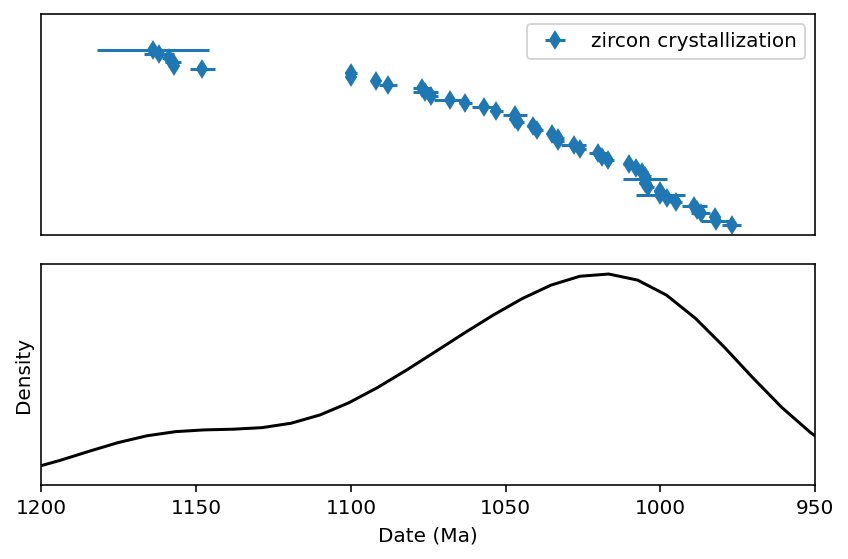

In [33]:
fig = plt.figure(figsize=(6,4))
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[2, 2])

fig.add_subplot(spec[0])

plt.errorbar(Grenville_monazite.Age,
             Grenville_monazite.index,
             xerr=Grenville_monazite.Error_Plus,
             fmt='d',color='C0',label='zircon crystallization')
plt.xlim(1200,950)
plt.gca().set_yticks([])
plt.gca().set_xticks([])
plt.legend(loc=1)

fig.add_subplot(spec[1])

sns.kdeplot(Grenville_monazite.Age,bw_adjust=0.2,color='black')
plt.xlim(1200,950)

plt.gca().set_yticks([])
plt.xlabel('Date (Ma)')

plt.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'U_Pb_sample_mean'

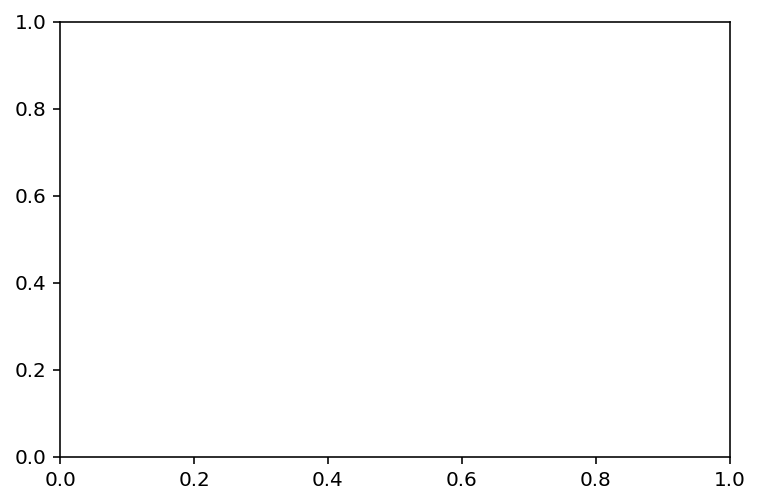

In [34]:
fig, ax = plt.subplots()
sns.kdeplot(MCR_dates.U_Pb_sample_mean,bw_adjust=1,color='tomato',ax=ax,label='Midcontinent Rift magmatism')
ax.set_yticks([])
plt.xlabel('Date (Ma)')
plt.legend(loc='upper left',bbox_to_anchor=[0,1.12])

ax2 = ax.twinx()
sns.kdeplot(Grenville_dates.Date,bw_adjust=0.3,color='C0',ax=ax2,label='Blue Ridge metamorphism')
ax2.set_yticks([])
plt.legend(loc='upper left',bbox_to_anchor=[0,1.2])
plt.ylabel('')
plt.xlabel('')
plt.xlim(1200,950)
plt.show()

In [ ]:
bootstrapped_dates

In [ ]:
Grenville_dates.Date

In [ ]:
def weighted_mean(dates,sigma):
    
    """
    calculated a weighted mean from dates and uncertainities
    
    input parameters
    ----------------
    dates: date of individual grains
    sigma: 1 sigma uncertainty associated with dates
    
    returns
    ----------------
    weighted_mean, 2 sigma uncertainty
    
    """
    
    inverse_variance=[]
    alpha=[]
    weighted_mean_calc=[]
    
    for n in range(0,len(dates)):
        value = 1/sigma[n]**2
        inverse_variance.append(value)
    inverse_variance_sum = np.sum(inverse_variance)
    
    for n in range(0,len(dates)):
        value = (1/sigma[n]**2)/inverse_variance_sum
        alpha.append(value)
        
    #calculate the weights for each date
    for n in range(0,len(dates)):
        value = alpha[n]*dates[n]
        weighted_mean_calc.append(value)
    
    #take the sum of the weights multiplied by the dates to get the weighted
    #mean (equation 64 of McLean et al., 2011)
    weighted_mean = np.sum(weighted_mean_calc)
    
    #the variance of the weighted mean is simply the inverse of the sum of
    #the inverse variances of each date (equation 66 of McLean et al., 2011)
    variance = 1/inverse_variance_sum
    
    weighted_mean_sigma = np.sqrt(variance)
    
    n = len(dates)
    
    print('The weighted mean is:')

    print(weighted_mean)

    print('With a 2sigma error of:')

    print(2*weighted_mean_sigma)
    
    print('N=' )
    print(n)
    
    return weighted_mean, 2*weighted_mean_sigma

Data from **Constraints on the timing and duration of orogenic events by combined Lu–Hf and Sm–Nd geochronology: An example from the Grenville orogeny**

Errors are 1$\sigma$

In [ ]:
J2018_z = pd.read_csv('../data/Johnson2018/Johnson2018_zircon.csv')
J2018_z_rim = J2018_z[J2018_z.rim_core=='rim']
J2018_z_rim_BV10 = J2018_z_rim[J2018_z_rim['sample_ID']=='BV10']
J2018_z_rim_S09 = J2018_z_rim[J2018_z_rim['sample_ID']=='S09']
J2018_z_rim_S10 = J2018_z_rim[J2018_z_rim['sample_ID']=='S10']
J2018_z_rim_ST10 = J2018_z_rim[J2018_z_rim['sample_ID']=='ST10']

In [ ]:
J2018_z_rim_BV10

In [ ]:
weighted_mean(J2018_z_rim_BV10['207Pb_206Pb_date'].tolist(),J2018_z_rim_BV10['207Pb_206Pb_date_err'].tolist())

In [ ]:
J2018_z_rim_S09

In [ ]:
weighted_mean(J2018_z_rim_S09['207Pb_206Pb_date'].tolist(),J2018_z_rim_S09['207Pb_206Pb_date_err'].tolist())

In [ ]:
J2018_z_rim_S10

In [ ]:
weighted_mean(J2018_z_rim_S10['207Pb_206Pb_date'].tolist(),J2018_z_rim_S10['207Pb_206Pb_date_err'].tolist())

In [ ]:
J2018_z_rim_ST10

In [ ]:
sns.histplot(J2018_z_rim['207Pb_206Pb_date'],bins=np.arange(800,1300,10))
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

In [ ]:
file_150 = '../data/Williams2019/16TG150-Elephant-Rock-Monazite-Composition-reformat.xlsx'
file_151 = '../data/Williams2019/16Tg151-Treadway-Mountain-Monzite-Composition-Reformat.xlsx'
file_153 = '../data/Williams2019/16TG153-Dixon-schist-Monazite Composition-reformat.xlsx'
file_154 = '../data/Williams2019/16TG154-Swede-Pond-Monazite-Composition-reformat.xlsx'

M2019_150 = pd.read_excel(file_150,header=2,nrows=24)
M2019_151 = pd.read_excel(file_151,header=2,nrows=37)
M2019_153 = pd.read_excel(file_153,header=2,nrows=14)
M2019_154 = pd.read_excel(file_154,header=3,nrows=37)

M2019_dates = M2019_150.Date.tolist() + M2019_151.Date.tolist() + M2019_153.Date.tolist() + M2019_154.Date.tolist()

In [ ]:
sns.histplot(M2019_dates,bins=50)
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

In [ ]:
sns.kdeplot(M2019_dates,bw_adjust=0.4)
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

In [ ]:
GSC_data.Age_Interpretation.unique()

In [ ]:
plt.hist(GSC_data_meta.Age,bins=400)
plt.xlim(2000,0)
plt.title('Metamorphic dates within GSC Knowledgebase')
plt.xlabel('Age (Ma)')
plt.ylabel('n')
plt.show()

In [ ]:
plt.subplot(2,1,1)
plt.hist(GSC_data_ign.Age,bins=100)
plt.xlim(2000,0)
plt.xlabel('Age (Ma)')
plt.subplot(2,1,2)
plt.hist(GSC_data_meta.Age,bins=100)
plt.xlim(2000,0)
plt.show()

Grenville Province data from GSC compilation



In [ ]:
plt.hist(GSC_data_meta_Grenville_monazite.Age,bins=400)
plt.xlim(1250,900)
plt.title('Metamorphic dates within GSC Knowledgebase')
plt.xlabel('Age (Ma)')
plt.ylabel('n')
plt.show()

In [ ]:
12